<a href="https://colab.research.google.com/github/neetmadann/Portfolio-GeoSpatial-and-Machine-Learning/blob/main/Titanic_Over_80_Accuracy_for_most_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Over 80% Accuracy in Most ML Models
## Full Data Exploration, Data Science ML, Ensemble Methods 

### Important Note from a Data Analyst/BI role transitioning into Data Science:

The Machine Learning Models may seem like the sexiest part. It is only partly true, it is the output. 
However, dealing with the non-sexy part, cleaning the data, which as reviewed from most Titanic ML,

we see so many ensemble methods, advanced feature engineering and programming skills, however even beginners can increase 
the accuracy of their model, by getting solid on the basics such as:
    
- Explore your data, know your data well
- What are the missing values, what type of imputation will help your model - pick the best one that retains the pattern ML models can read
or if can't the ones that don't disturb your model
- How are you going to dealingl with your Outliers? Do the outliers make sense and are actual, if they are how do we reduce the Outlier range
so the ML model retains the best and is not disturbed but performs better?
- Do you have an unbalanced dataset for your classification? If so the side that is more will have more input into the model. It is better to balance it.
Which method can you use to balance your dataset? Random UnderSampling, Oversampling or SMOTE?

Short Hand to the Point Prediction Note Before You Start:
- Titanic case study prediction results require you to predict whether someone Survives versus did not Survive

- Results require: Binary Output [1,0]

- Original training dataset provides you with the results, making this a labelled machine learning case study - hence Supervised Learning

- Classification into 2 classes - hence a Classification prediction model and not Regression Model

## Import Packages

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os
from sklearn import preprocessing

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model evaluations
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, classification_report # classification metrics

# Models from Scikit-Learn
from sklearn import preprocessing
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# Data Preparation (imbalanced and standardization)
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import StandardScaler # scaling method
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
#change current directory
os.chdir(r'C:\Users\neetm\Dropbox\Kaggle Projects\Titanic Project')
path = os.getcwd()

### Import Titanic Dataset Train & Test

In [ ]:
train_df = pd.read_csv(path+f'\\train.csv') #read train dataset
test_df = pd.read_csv(path+f'\\test.csv') #read test dataset

In [ ]:
print(len(train_df))
print(len(test_df))

891
418


In [ ]:
display(train_df.columns.tolist()) #see columns in entire dataset train_df.columns #Columns left
display(test_df.columns.tolist()) #see columns in entire dataset test_df.columns #Columns left

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
train_df.dtypes #read datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Cabin has too many null values, might be good to remove
display(train_df.info(null_counts=True))
display(test_df.info(null_counts=True)) #just like the competition described, target variable results are not in Test df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\neetm\AppData\Local\Temp\ipykernel_14444\2353170861.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  display(train_df.info(null_counts=True))


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\neetm\AppData\Local\Temp\ipykernel_14444\2353170861.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  display(test_df.info(null_counts=True)) #just like the competition described, target variable results are not in Test df


None

<AxesSubplot: >

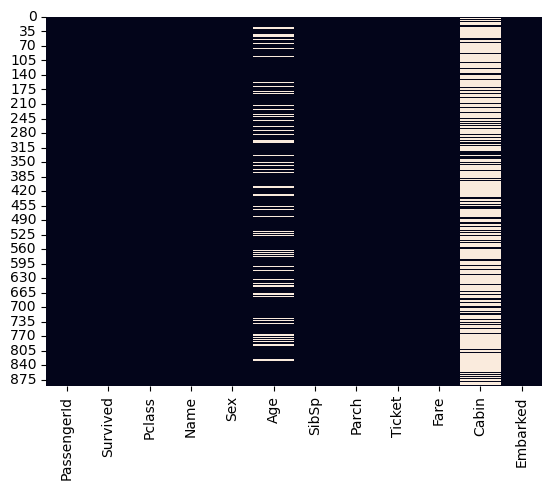

In [ ]:
#check column with null
display(sns.heatmap(train_df.isnull(), cbar=False))  #we can create cabin non cabin info to see if it adds, remove cabin column
#fill null age with mean

<AxesSubplot: >

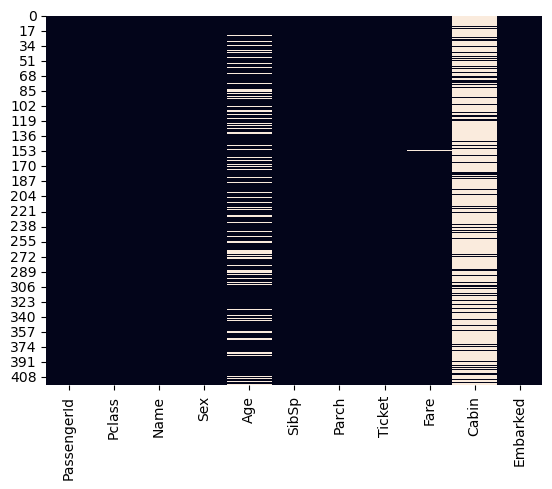

In [ ]:
display(sns.heatmap(test_df.isnull(), cbar=False)) #similar issue with test dataset, we need to inpute data in both

In [ ]:
display(train_df.describe())
display(test_df.describe())
#to understand both the datasets, you can see the mean is very similar for Age, Fare, if outliers are dealt with should be dealt
#in both datasets

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Dataset Background/Notes

- PassengerId - Id 
- Survived - 0,1 0 - did not survive, 1 survived - target variable for Classification ML - Y (dependent variable)
- Pclass - Passenger Class - ordinal data - X (independent variable)
- Name - Name of Passenger - label - X (independent variable)
- Sex - Gender, male: female - categorical - X (independent variable)
- Age - Age of Passenger - numeric - X (independent variable)
- SibSp -  # of siblings/spouses aboard with them - numeric - X (independent variable)
- Parch -  # of parents/children aboard with them - numeric - X (independent variable)
- Ticket - Ticket Number - label
- Fare - Price of Fare - numeric - X (independent variable)
- Cabin - Cabin They Sat in - label - X (independent variable)
- Embarked - Where were they picked up/embarked from 4 categories - categorical - X (independent variable) Port Embarked from C (Cherbourg), Q (Queenstown), S (Southampton)

In [ ]:
#number of unique values in each column 
{column: len(train_df[column].unique()) for column in train_df.columns}

{'PassengerId': 891,
 'Survived': 2,
 'Pclass': 3,
 'Name': 891,
 'Sex': 2,
 'Age': 89,
 'SibSp': 7,
 'Parch': 7,
 'Ticket': 681,
 'Fare': 248,
 'Cabin': 148,
 'Embarked': 4}

In [ ]:
df_ = train_df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [ ]:
train_df.head()
len(train_df)

891

In [ ]:
len(train_df)
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_df.columns #Columns left

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot: >

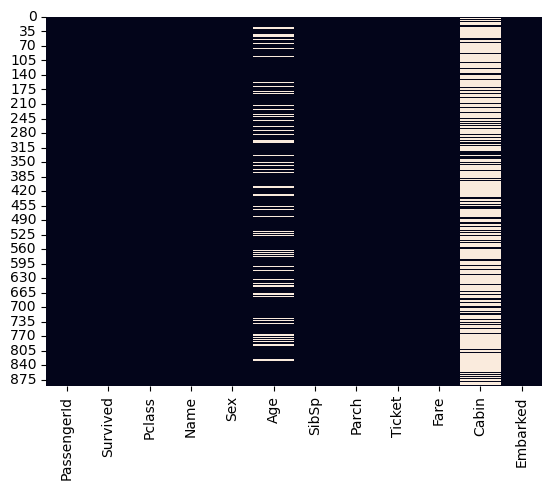

In [ ]:
#check column with null
sns.heatmap(train_df.isnull(), cbar=False)  #we can create cabin non cabin info to see if it adds, remove cabin column
#fill null age with mean

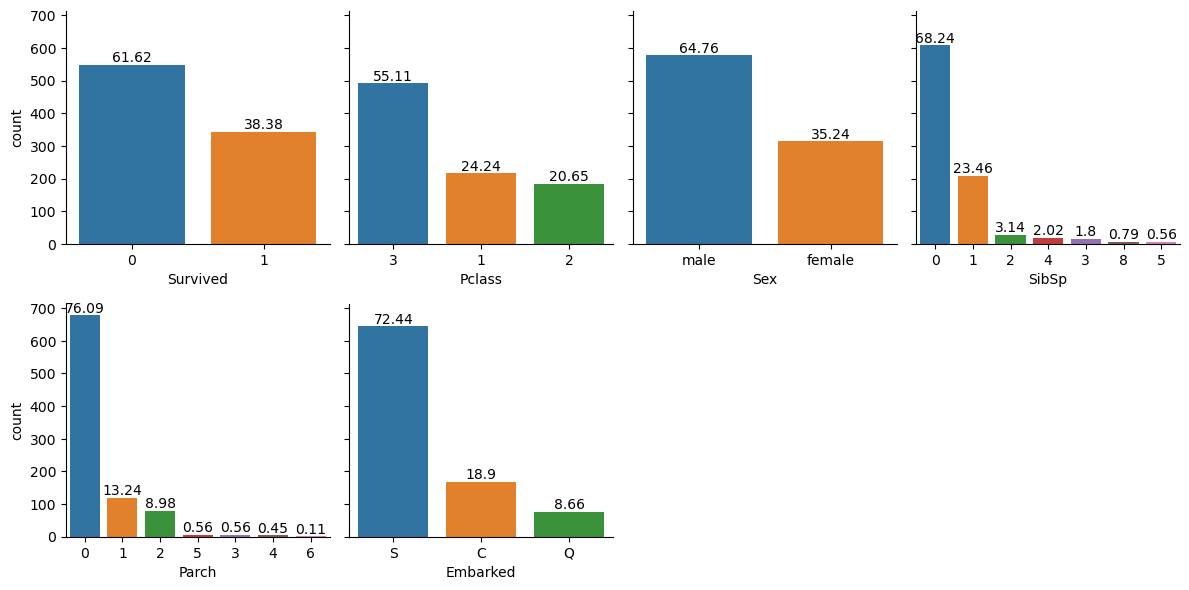

In [ ]:
#Data Exploration for Categorical Variables
x_vars = ['Survived', 'Pclass', 'Sex','SibSp', 'Parch','Embarked'] #put all the categorical/ordinal variables into this list, can use same code
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)

for ax, x_var in zip(g.axes, x_vars):
    sns.countplot(x=train_df[x_var],order=train_df[x_var].value_counts(ascending=False).index,ax=ax)
    abs_values = np.round((train_df[x_var].value_counts(ascending=False).values/train_df[x_var].count())*100,2)
    ax.bar_label(container=ax.containers[0], labels=abs_values)
g.tight_layout()

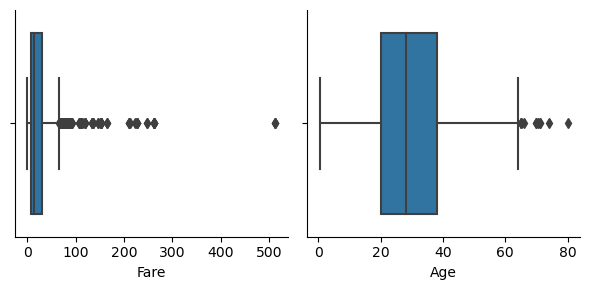

In [ ]:
#Checking distribution of Numeric Variables
x_vars = ['Fare', 'Age']
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=2, sharex=False)

for ax, x_var in zip(g.axes, x_vars):
    sns.boxplot(x=train_df[x_var],ax=ax)
g.tight_layout()
#need to deal with outliers: Winsorization is a method of dealing with Outliers, we will describe Outliers detection and methods below

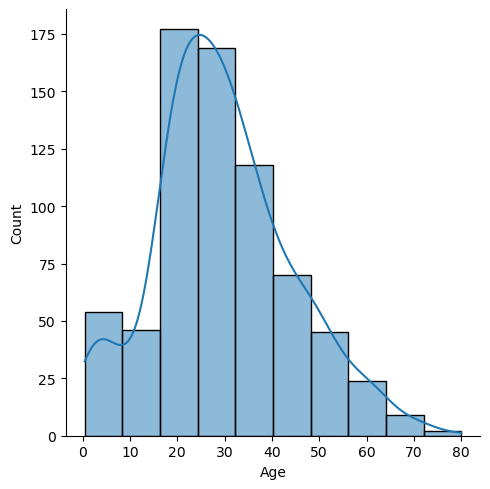

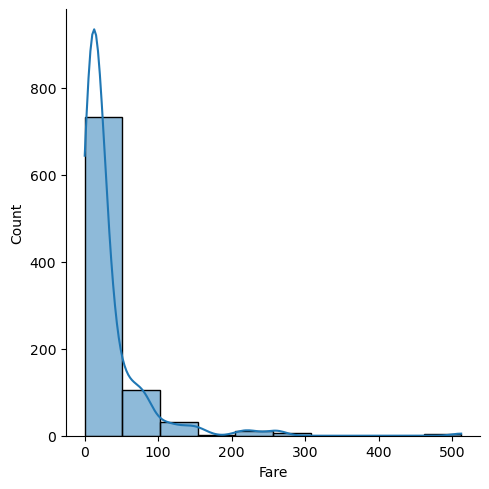

In [ ]:
display(sns.displot(x=train_df['Age'],kde=True,bins=10)) #Age also has alot of null values 
display(sns.displot(x=train_df['Fare'],kde=True,bins=10))

#Check dataset skewness for continuous variables - Age and Fare

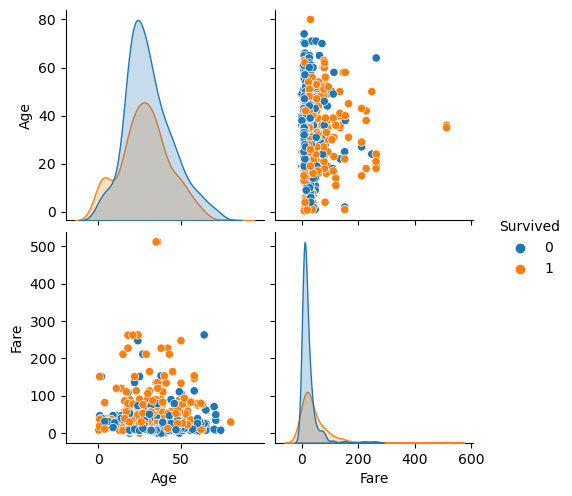

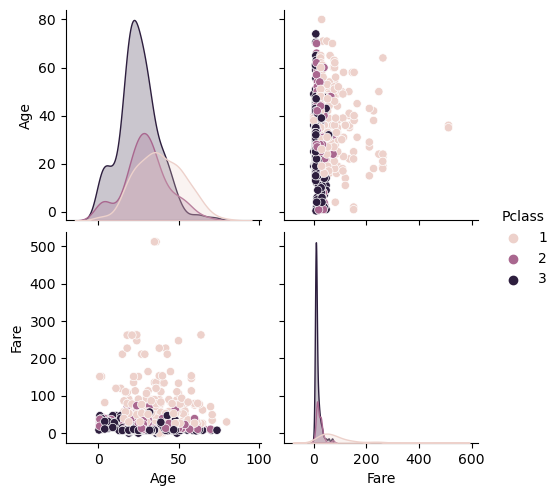

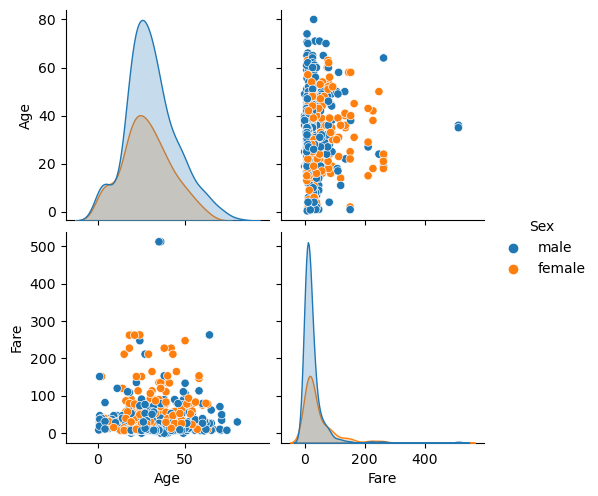

In [ ]:
#How to study your continuous variables behavior versus categorical variables, are there any patterns?
sns.pairplot(train_df,vars=['Age','Fare'],hue='Survived') #vars as continuous variables, hue is categorical variable
sns.pairplot(train_df,vars=['Age','Fare'],hue='Pclass') 
sns.pairplot(train_df,vars=['Age','Fare'],hue='Sex') 

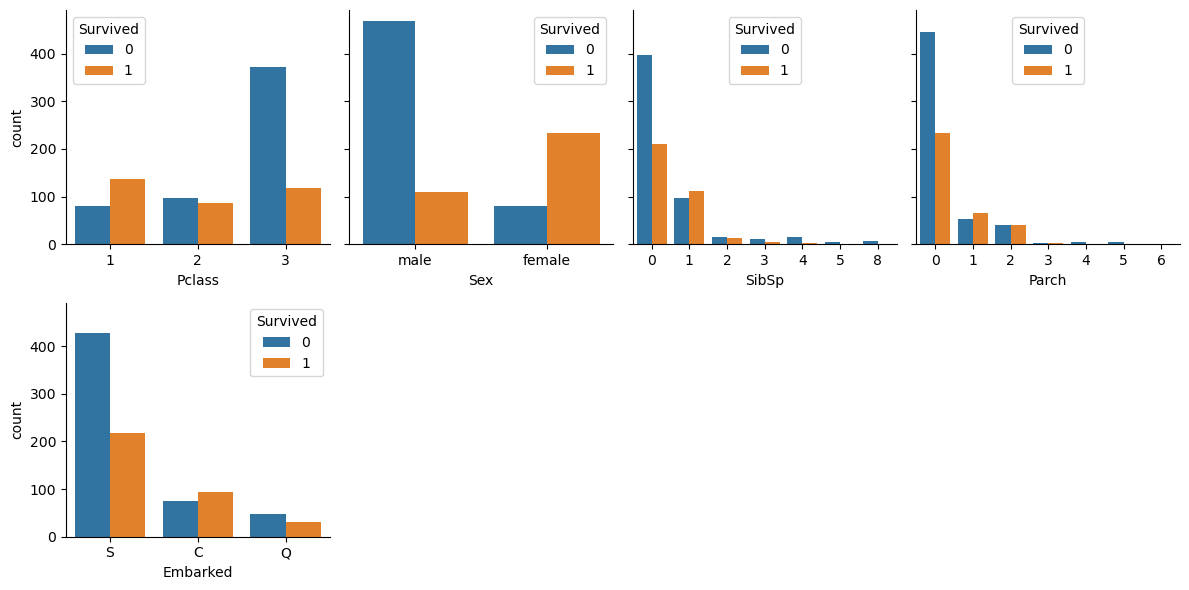

In [ ]:
x_vars = ['Pclass', 'Sex','SibSp', 'Parch','Embarked']
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=4, sharex=False)

for ax, x_var in zip(g.axes, x_vars):
    sns.countplot(data = train_df, x=train_df[x_var],hue = 'Survived', ax=ax)
g.tight_layout()

## Data Exploration Notes
 - 38.38 % Survived, 61.62 % did not survive, imbalanced dataset between survived and non-survived, can use random oversampling, for survived to avoid. 
 
 Why balanced the dataset?
 
 Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. Due to limitation in lesser number of boats we do expect imbalance where survival rate is low, but the imbalance classification causes model to focus more on those that did not survive due to higher number of samples in training dataset.
 
 
 Further Exploration
 
 - 55.11% of passengers are in 3rd Class
 - 64.76% of passengers are Male, Females are minority
 - 68.24 % Travelled Alone without siblings 
 - 76.09% travelled without parents or children
 - 72.44% Embarked from Southampton, 18.9% from Cherbourg and 8.66% Queenstown
 - Need to combined siblings + parents or children as new feature whether travelled alone entirely without siblings/parents/children
 
 Pairplot
 - The individuals who paid highest Fare seemed to have survived 
 - Highest age groups did not survive 
 - Fare for Third class is the lowest - obvious
 - Females that aboarded the train did not exceed 40
 
 Countplot of Categorical variables (Cross tab with Survival)
 - Females had higher survival rate than males
 - those who had embarked as Cherbourg (C) were lesser in Count than Southampton, but had higher survival rate than non survived.
 - Count of Southampton was higher survival, also because the no. of those who embarked from Southampton were higher. 
 - Those who travelled alone without Siblings, Parents and Children were more likely to survive - could have probably took the boat without waiting to save anyone or stay behind with anyone?
 - First class had higher chances of survival % when compared to non survived. 
 
Interesting/Surprising Results
 - Females are a minority but more % of Survival
 - Cherbourg Port of Embarked, lesser passengers but higher % of survival
 - Not so surprising % of Lower Age groups higher % of Survival 
 
 

## Data Cleaning, Feature Engineering to Apply to X (combine train and test)
#### Any feature creation, changes, needs to be done in Train and Test data set for X features for machine learning 

In [ ]:
#Setting feature vector and target variable
target_variable = 'Survived'
y_train = pd.DataFrame(train_df[target_variable]) #add target variable Severity to y - dependent variable
X_train = train_df.drop(target_variable,axis=1)   #remove target variable from x features, and rest are features
X_test = test_df
X_train['train_test'] = 'train'
X_test['train_test'] = 'test'
X = pd.concat([X_train, X_test])
len(X)

1309

In [ ]:
X = X.drop(['PassengerId','Ticket'], axis=1) #remove passengerid, name and cabin which has most null values

In [ ]:
X.dtypes

Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
train_test     object
dtype: object

## Imputation of Missing Variables for X after combined both train & test dataset

In [ ]:
## In this case we will use the mean and then check the distribution of the variables again

In [ ]:
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'] = X['Fare'].fillna(X['Fare'].mean()) #1 row with null Fare in test dataset

In [ ]:
X[X['Age'].isna()] #imputed nan with mean, missing values are no longer there

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test


In [ ]:
X.dtypes

Pclass          int64
Name           object
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
train_test     object
dtype: object

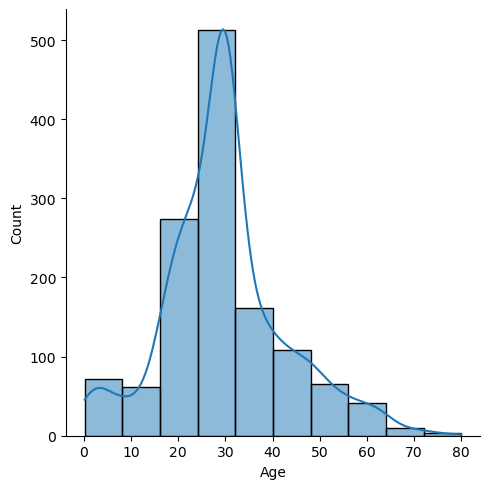

In [ ]:
#Check displot after imputing to see age distribution again
sns.displot(X['Age'],kde=True,bins=10) #Age also has alot of null values 
#With this method distribution of dataset remains the same, still skewed towards the left, ML cannot deal with missing values

### How to deal with Outliers?
We could deal with Outliers by using mean, median and remove the rows with Outliers. These are easy ways, however, with a small dataset we prefer to retain as many samples as possible

However, a personal method I prefer is to trust the original dataset, of course this depends on how clean and believable the original dataset is as well, for this particular one the Fare and Age in original dataset seems to reflect reality. Hence, we choose to retain the rane of lows and high values in the dataset, to the lowest values and highest values in range that is acceptable for ML model to perform at it's best. 

In this we will use Winsorization, first we check the values using Boxplot again and analyse the range for Age and Fare, two continuous variables, where both have Outliers. 

#### Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.
First to understand how to tranform at what percentile, we check the percentile for Age (Low, High Percentiles). Same concept for Fare

In [ ]:
tile_list = [0.05,0.10,0.25,0.50,0.75,0.95,0.99,1] #check values for both Age and Fare at all these percentiles
#codes are reusable for all ML models for Outliers

age_tile =list()
Fare_tile =list()
for i in tile_list:
    value = round(X['Age'].quantile(i))
    value2 = round(X['Fare'].quantile(i))
    age_tile.append(value)
    Fare_tile.append(value2)
tile_list = pd.DataFrame(tile_list)
age_tile = pd.DataFrame(age_tile)
Fare_tile = pd.DataFrame(Fare_tile)
both_tiles = pd.merge(pd.merge(tile_list,age_tile,left_index=True, right_index=True),Fare_tile,left_index=True, right_index=True)
both_tiles.columns = ['Percentile','Age','Fare']
both_tiles


,Percentile,Age,Fare
0,0.05,7,7
1,0.10,16,8
2,0.25,22,8
3,0.50,30,14
4,0.75,35,31
5,0.95,55,134
6,0.99,64,262
7,1.00,80,512


In [ ]:
# Deal with Outliers for Age
agelow_limit = X["Age"].quantile(0.05) #save low limit
ageup_limit = X["Age"].quantile(0.99) #saved upper limit
X["Age"] = np.where(X["Age"]>ageup_limit, ageup_limit ,
                        np.where(X["Age"]< agelow_limit , agelow_limit ,
                        X["Age"])) #replace all lower outlier with 1 percentile and upper with 99 percentile
#this is called Winsorization

In [ ]:
# Deal with Outliers for Fare, for Fare I cap it at 25 percentile
farelow_limit = X["Fare"].quantile(0.25) #save low limit
fareup_limit = X["Fare"].quantile(0.95) #saved upper limit
X["Fare"] = np.where(X["Fare"]>fareup_limit,fareup_limit,
                        np.where(X["Age"]< farelow_limit,farelow_limit,
                        X["Fare"])) #replace all lower outlier with 1 percentile and upper with 99 percentile
#this is called Winsorization

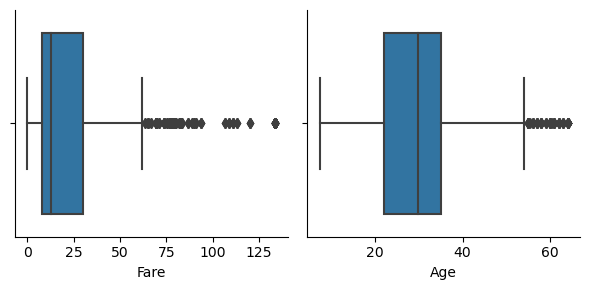

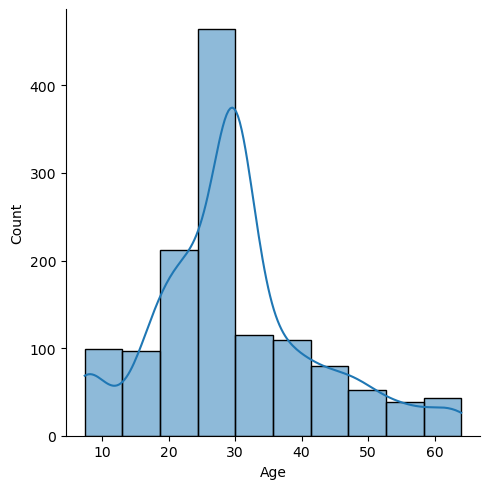

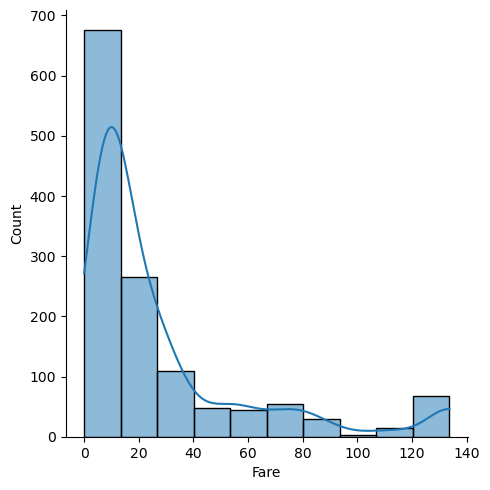

In [ ]:
#Checking distribution of After Outliers are dealt with
x_vars = ['Fare', 'Age']
g = sns.FacetGrid(pd.DataFrame(x_vars), col=0, col_wrap=2, sharex=False)

for ax, x_var in zip(g.axes, x_vars):
    sns.boxplot(x=X[x_var],ax=ax)
g.tight_layout()
#need to deal with outliers: Winsorization is a method of dealing with Outliers, we will describe Outliers detection and methods below

sns.displot(X['Age'],kde=True,bins=10) #Age also has alot of null values 
sns.displot(X['Fare'],kde=True,bins=10) #Age also has alot of null values 

#Below is not a perfect normal distribution but we somehow dealt with outliers to a certain extent, instead of using Mean removing all of the lows/highs in Age and Fare

## New Feature Creation 

In [ ]:
#New Metrics is created based on existing Features. Did the person travel alone? Based on traved with siblings + parent & child
#Was there cabin information? Can we assumed a cabin was not assigned?, we will see this with PClass exploration
#Possible to assume that cabin not assigned is with Low Pclass? Let's see this soon

X['Alone?'] = np.where(X['SibSp']+X_train['Parch']==0,1,0) #If alone 1, if not 0
X['Cabin?']= np.where(X['Cabin'].isna(),0,1) #if assigned cabin Yes, if not No

In [ ]:
X['Title'] = X['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [ ]:
X['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

<AxesSubplot: >

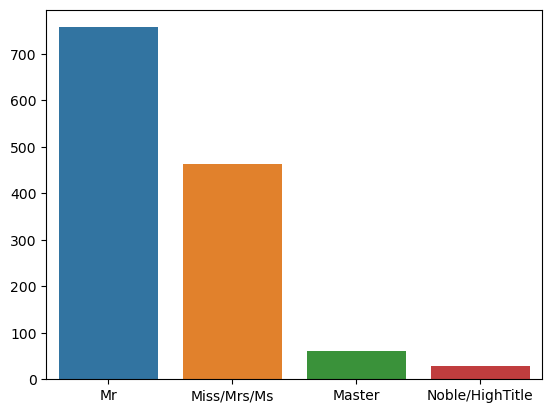

In [ ]:
X['Title'] = X['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle',  'Mme',  'Dona'], 'Miss/Mrs/Ms')
X['Title'] = X['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev','the Countess','Lady'], 'Noble/HighTitle')
sns.barplot(x=X['Title'].value_counts().index, y=X['Title'].value_counts().values)

## Label Encoding for Machine Learning for Categorical Variables

In [ ]:
# Label Encoding for Categorical Variables
le = preprocessing.LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

le = preprocessing.LabelEncoder()
X['Embarked'] = le.fit_transform(X['Embarked'])

le = preprocessing.LabelEncoder()
X['Title'] = le.fit_transform(X['Title'])

In [ ]:
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,train_test,Alone?,Cabin?,Title
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,2,train,0,0,2
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,0,train,1,1,1
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,2,train,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,2,train,0,1,1
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,2,train,1,0,2


In [ ]:
X = X.drop(['Name','Cabin'],axis=1) #drop unneeded columns

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      1309 non-null   int64  
 1   Sex         1309 non-null   int32  
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   Fare        1309 non-null   float64
 6   Embarked    1309 non-null   int32  
 7   train_test  1309 non-null   object 
 8   Alone?      1309 non-null   int32  
 9   Cabin?      1309 non-null   int32  
 10  Title       1309 non-null   int32  
dtypes: float64(2), int32(5), int64(3), object(1)
memory usage: 129.4+ KB


In [ ]:
display(X.head())
display(X.describe()) #You can see the scales do not all vary that much but there are some varying scales Fare, Age versus other variables
#standardise your variables before machine learning to avoid - varying scales in variables for ML models that use Euclidean distance

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,Alone?,Cabin?,Title
0,3,1,22.0,1,0,7.2500,2,train,0,0,2
1,1,0,38.0,1,0,71.2833,0,train,1,1,1
2,3,0,26.0,0,0,7.9250,2,train,0,0,1
3,1,0,35.0,1,0,53.1000,2,train,0,1,1
4,3,1,35.0,0,0,8.0500,2,train,1,0,2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone?,Cabin?,Title
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,30.047471,0.498854,0.385027,28.361240,1.495034,0.572956,0.225363,1.574484
std,0.837836,0.478997,12.243170,1.041658,0.865560,33.246901,0.816130,0.494838,0.417981,0.617029
min,1.000000,0.000000,7.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,29.881138,0.000000,0.000000,13.000000,2.000000,1.000000,0.000000,2.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,30.000000,2.000000,1.000000,0.000000,2.000000
max,3.000000,1.000000,64.000000,8.000000,9.000000,133.650000,3.000000,1.000000,1.000000,3.000000


## Split Train and Test for Machine Learning
#### Important Note:  Need to Merge Train Dataset back with Y (target variable - random over sample to deal with imbalanced class for training)

In [ ]:
X_train = X[X['train_test']=='train'] #split train test (Only X variables, target y survived excluded)
X_test = X[X['train_test']=='test'] #split train test (Only X variables, target y survived not in)

In [ ]:
X_train = X_train.drop(['train_test'],axis=1) #drop columns initially created to tag train and test when feature engineering
X_test = X_test.drop(['train_test'],axis=1)

### What are ways to deal with Imbalanced Dataset?

Before Random Oversampling for Train Dataset
Not Survived vs Survived %


array([61.62, 38.38])

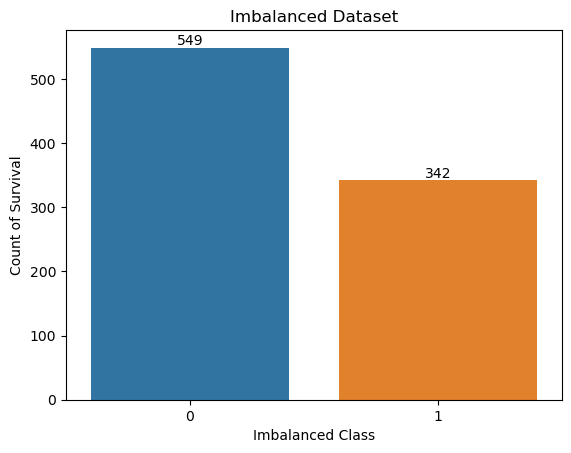

In [ ]:
print('Before Random Oversampling for Train Dataset')

ax = sns.countplot(x=train_df['Survived'],
                   order=train_df['Survived'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = train_df['Survived'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Imbalanced Class")
plt.ylabel("Count of Survival")
plt.title("Imbalanced Dataset")
#strategic 

print('Not Survived vs Survived %')
np.round(train_df['Survived'].value_counts(ascending=False).values/train_df['Survived'].count()*100,2)

Random Oversampling for Survived to balance the dataset


Text(0.5, 1.0, 'Imbalanced Dataset')

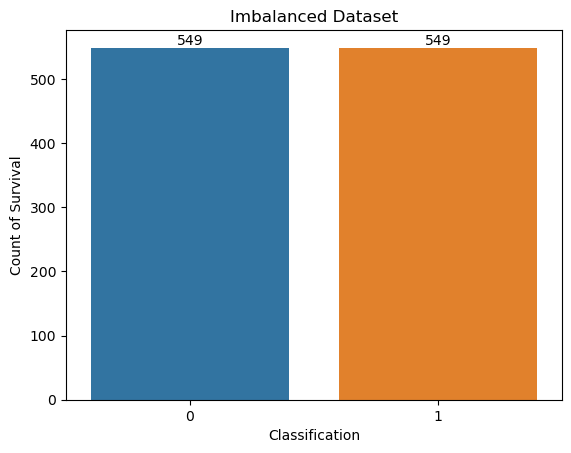

In [ ]:
print('Random Oversampling for Survived to balance the dataset')
#example of random undersampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
# define undersample strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over_train, y_over_train = oversample.fit_resample(X_train, y_train)


ax = sns.countplot(x=y_over_train['Survived'],
                   order=y_over_train['Survived'].value_counts(ascending=False).index); #plot nominal data frequency distribution
abs_values = y_over_train['Survived'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xlabel("Classification")
plt.ylabel("Count of Survival")
plt.title("Imbalanced Dataset")
#strategic 
#balanced minority dataset by random over sampling of minority dataset

In [ ]:
display(len(X_over_train))
display(len(y_over_train))

1098

1098

<AxesSubplot: >

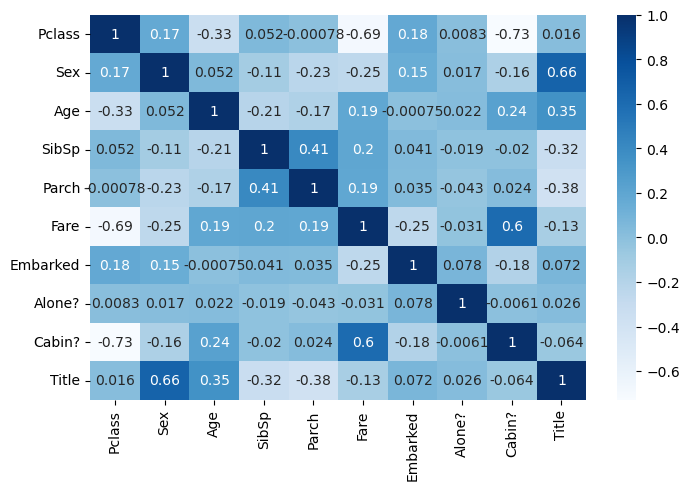

In [ ]:
#Check for Multicollinearity - correlation between variables to see if all ML models works for this
fig, ax = plt.subplots(figsize=(8,5)) 
corr = X_over_train.corr()
sns.heatmap(corr, cmap="Blues", annot=True) 
#correlation between Fare and Cabin seems abit high, should be bearable as its just 7 tiny points above 50% we confirm to move ahead
#not a high multicollinearity issue

## Feature Importance Check 
 - using Random Forest - random forest is not impacted by multicollinearity or scaling of variables, hence we could do this without needing both

In [ ]:
#Preliminary Feature Selection with Random Forest Feature Importance check
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model to the training set

clf.fit(X_over_train, np.ravel(y_over_train)) #need to ravel for y 

RandomForestClassifier(random_state=42)

Fare        0.226709
Age         0.209267
Title       0.200402
Sex         0.104653
Pclass      0.071063
SibSp       0.056395
Parch       0.034220
Cabin?      0.032702
Alone?      0.032548
Embarked    0.032041
dtype: float64


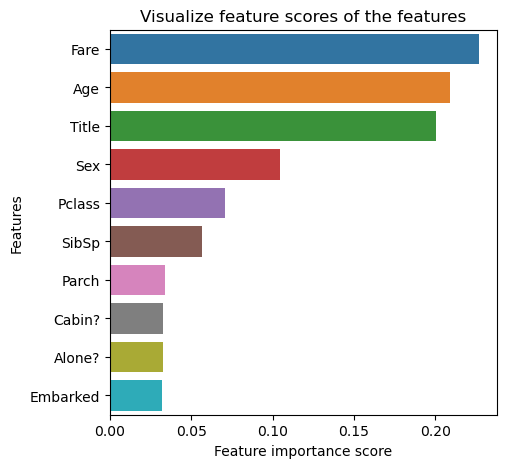

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_over_train.columns).sort_values(ascending=False)
print(feature_scores) #cabin is not as important as Fare may remove to see if performance of model improves

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

## Easy ML Models before with go into Ensemble Models

In [ ]:
#Split train into train and test to find out accuracy before we work on final test set to send in for competition
#Practise: Splitting data into train and test, to check the whole pipeline if it works then we create a machine learning pipeline
#train and test is done by 60%, 40% split
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_over_train,np.ravel(y_over_train),test_size=0.4,random_state=1,shuffle=True)

In [ ]:
print(len(X_train1))
print(len(X_test1))

print(len(y_train1))
print(len(y_test1))

658
440
658
440


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform (X_test1)
X_test = sc.transform (X_test)

In [ ]:
pd.DataFrame(X_test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       418 non-null    float64
 1   1       418 non-null    float64
 2   2       418 non-null    float64
 3   3       418 non-null    float64
 4   4       418 non-null    float64
 5   5       418 non-null    float64
 6   6       418 non-null    float64
 7   7       418 non-null    float64
 8   8       418 non-null    float64
 9   9       418 non-null    float64
dtypes: float64(10)
memory usage: 32.8 KB


### Logistic Regression with Grid Search

In [ ]:
train_acc = list()
test_acc = list()
classifier = list()

import warnings
warnings.filterwarnings('ignore', message='not allowed')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.1,1,100,1000]}
grid = GridSearchCV(LogisticRegression(max_iter=1000),param_grid)
grid.fit(X_train1,y_train1)
print(grid.best_params_)
print(grid.score(X_test1,y_test1))

lg_model = LogisticRegression(C=100,max_iter=1000,random_state=42)
lg_model.fit(X_train1, y_train1)
lg_pred = lg_model.predict(X_test1)

print(confusion_matrix(y_test1,lg_pred))
print('\n')
print(classification_report(y_test1,lg_pred))

lreg_train = pd.DataFrame({ "actual": y_train1, "fitted": lg_model.predict(X_train1)})
lreg_test = pd.DataFrame({ "actual": y_test1, "fitted": lg_model.predict(X_test1)})

log_train_result = accuracy_score(lreg_train.actual, lreg_train.fitted)
log_test_result = accuracy_score(lreg_test.actual, lreg_test.fitted)
print("Logistic - Accuracy on train:",log_train_result)
print("Logistic - Accuracy on test:",log_test_result)
print(" - ")

#results look good with minimal overfitting
train_acc = train_acc.append(log_train_result)
test_acc = test_acc.append(log_test_result)
classifier = classifier.append(['log_reg'])

{'C': 0.1}
0.8045454545454546
[[170  36]
 [ 48 186]]


              precision    recall  f1-score   support

           0       0.78      0.83      0.80       206
           1       0.84      0.79      0.82       234

    accuracy                           0.81       440
   macro avg       0.81      0.81      0.81       440
weighted avg       0.81      0.81      0.81       440

Logistic - Accuracy on train: 0.8069908814589666
Logistic - Accuracy on test: 0.8090909090909091
 - 


Sex         0.871899
Title       0.870739
SibSp       0.528460
Pclass      0.499859
Cabin?      0.448393
Age         0.231472
Parch       0.197316
Embarked    0.099937
Fare        0.012380
Alone?      0.000205
dtype: float64


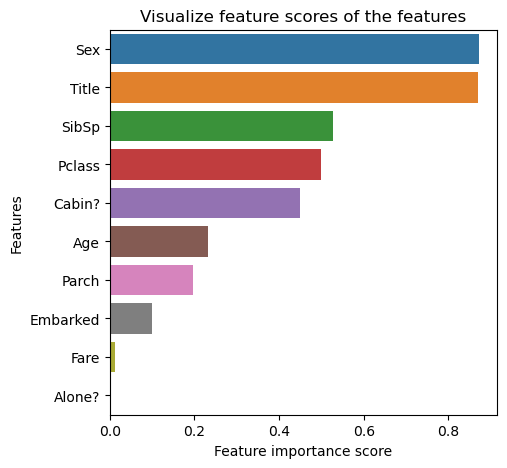

In [ ]:
#Feature Scores for Logistic Regression is different from Random Forest
# Logistic Regression takes Sex as the most important Feature, there is also an imbalance in Gender maybe that's why Randomforest performs slightly better

feature_scores = pd.Series(abs(lg_model.coef_[0]), index=X_over_train.columns).sort_values(ascending=False)
print(feature_scores) #cabin is not as important as Fare may remove to see if performance of model improves

# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(5, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
### KNN with Gridsearch
param_grid = {'n_neighbors': range(1,20)}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train1,y_train1)
knn.best_params_ # best parameter
knn_pred = knn.predict(X_test1)
print(confusion_matrix(y_test1,knn_pred))
print('\n')
print(classification_report(y_test1,knn_pred))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.742 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.780 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.765 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.786 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.802 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.697 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.735 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.780 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.718 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.817 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.758 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3;

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train1,y_train1)
gnb_pred = gnb.predict(X_test1)

cm_gnb = confusion_matrix(y_test1,gnb_pred)
print(cm_gnb)
print('\n')
print(classification_report(y_test1,gnb_pred))
recall = np.diag(cm_gnb) / np.sum(cm_gnb, axis = 1)
print(recall)


gnb_train = pd.DataFrame({ "actual": y_train1, "fitted": gnb.predict(X_train1)})
gnb_test = pd.DataFrame({ "actual": y_test1, "fitted": gnb.predict(X_test1)})

print("Naives Bayes - Accuracy on train:", accuracy_score(gnb_train.actual, gnb_train.fitted))
print("Naives Bayes - Accuracy on test:", accuracy_score(gnb_test.actual, gnb_test.fitted))
print(" - ")

##slight overfitting, not a lot, similar results to Logistic Regression

[[156  50]
 [ 40 194]]


              precision    recall  f1-score   support

           0       0.80      0.76      0.78       206
           1       0.80      0.83      0.81       234

    accuracy                           0.80       440
   macro avg       0.80      0.79      0.79       440
weighted avg       0.80      0.80      0.80       440

[0.75728155 0.82905983]
Naives Bayes - Accuracy on train: 0.7993920972644377
Naives Bayes - Accuracy on test: 0.7954545454545454
 - 


## Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train1,y_train1)
dtree_pred = dtree.predict(X_test1)

print(confusion_matrix(y_test1,dtree_pred))
print('\n')
print(classification_report(y_test1,dtree_pred))

dtree_train = pd.DataFrame({ "actual": y_train1, "fitted": dtree.predict(X_train1)})
dtree_test = pd.DataFrame({ "actual": y_test1, "fitted": dtree.predict(X_test1)})

print("Decision Tree - Accuracy on train:", accuracy_score(dtree_train.actual, dtree_train.fitted))
print("Decision Tree - Accuracy on test:", accuracy_score(dtree_test.actual, dtree_test.fitted))
print(" - ")
#Overfitting higher than other models but results for test are also better

[[168  38]
 [ 37 197]]


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.84      0.84      0.84       234

    accuracy                           0.83       440
   macro avg       0.83      0.83      0.83       440
weighted avg       0.83      0.83      0.83       440

Decision Tree - Accuracy on train: 0.993920972644377
Decision Tree - Accuracy on test: 0.8295454545454546
 - 


## Random Forest is a Decision Tree Ensemble Method - Basic one 

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train1,y_train1)
rfc_pred = rfc.predict(X_test1)

print(confusion_matrix(y_test1,rfc_pred))
print('\n')
print(classification_report(y_test1,rfc_pred))

rfc_train = pd.DataFrame({ "actual": y_train1, "fitted": rfc.predict(X_train1)})
rfc_test = pd.DataFrame({ "actual": y_test1, "fitted": rfc.predict(X_test1)})

print("Random forest - Accuracy on train:", accuracy_score(rfc_train.actual, rfc_train.fitted))
print("Random forest - Accuracy on test:", accuracy_score(rfc_test.actual, rfc_test.fitted))
print(" - ")

[[177  29]
 [ 32 202]]


              precision    recall  f1-score   support

           0       0.85      0.86      0.85       206
           1       0.87      0.86      0.87       234

    accuracy                           0.86       440
   macro avg       0.86      0.86      0.86       440
weighted avg       0.86      0.86      0.86       440

Random forest - Accuracy on train: 0.993920972644377
Random forest - Accuracy on test: 0.8613636363636363
 - 


## Bagging Classifier with Decision Tree as an Ensemble Method

In [ ]:
bgc = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)
bgc.fit(X_train1,y_train1)
bgc_pred = bgc.predict(X_test1)

print(confusion_matrix(y_test1,bgc_pred))
print('\n')
print(classification_report(y_test1,bgc_pred))

bgc_train = pd.DataFrame({ "actual": y_train1, "fitted": bgc.predict(X_train1)})
bgc_test = pd.DataFrame({ "actual": y_test1, "fitted": bgc.predict(X_test1)})


print("Bagging Classifier - Accuracy on train:", accuracy_score(bgc_train.actual, bgc_train.fitted))
print("Bagging Classifier - Accuracy on test:", accuracy_score(bgc_test.actual, bgc_test.fitted))
print(" - ")

[[179  27]
 [ 30 204]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       206
           1       0.88      0.87      0.88       234

    accuracy                           0.87       440
   macro avg       0.87      0.87      0.87       440
weighted avg       0.87      0.87      0.87       440

Bagging Classifier - Accuracy on train: 0.993920972644377
Bagging Classifier - Accuracy on test: 0.8704545454545455
 - 


## Bagging Classifier with KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=13))

bagging_knn.fit(X_train1, y_train1)
bagging_knn_pred = bagging_knn.predict(X_test1)

print(confusion_matrix(y_test1,bagging_knn_pred))
print('\n')
print(classification_report(y_test1,bagging_knn_pred))

bagging_knn_train = pd.DataFrame({ "actual": y_train1, "fitted": bagging_knn.predict(X_train1)})
bagging_knn_test = pd.DataFrame({ "actual": y_test1, "fitted": bagging_knn.predict(X_test1)})


print("Bagging KNN - Accuracy on train:", accuracy_score(bagging_knn_train.actual, bagging_knn_train.fitted))
print("Bagging KNN - Accuracy on test:", accuracy_score(bagging_knn_test.actual, bagging_knn_test.fitted))
print(" - ")

[[174  32]
 [ 45 189]]


              precision    recall  f1-score   support

           0       0.79      0.84      0.82       206
           1       0.86      0.81      0.83       234

    accuracy                           0.82       440
   macro avg       0.82      0.83      0.82       440
weighted avg       0.83      0.82      0.83       440

Bagging KNN - Accuracy on train: 0.8130699088145896
Bagging KNN - Accuracy on test: 0.825
 - 


In [ ]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear',random_state=42)
svc_model.fit(X_train1, y_train1)
svc_pred = svc_model.predict(X_test1)

print(confusion_matrix(y_test1,svc_pred))
print('\n')
print(classification_report(y_test1,svc_pred))

svc_train = pd.DataFrame({ "actual": y_train1, "fitted": svc_model.predict(X_train1)})
svc_test = pd.DataFrame({ "actual": y_test1, "fitted": svc_model.predict(X_test1)})


print("SVC - Accuracy on train:", accuracy_score(svc_train.actual, svc_train.fitted))
print("SVC - Accuracy on test:", accuracy_score(svc_test.actual, svc_test.fitted))
print(" - ")


[[175  31]
 [ 60 174]]


              precision    recall  f1-score   support

           0       0.74      0.85      0.79       206
           1       0.85      0.74      0.79       234

    accuracy                           0.79       440
   macro avg       0.80      0.80      0.79       440
weighted avg       0.80      0.79      0.79       440

SVC - Accuracy on train: 0.7933130699088146
SVC - Accuracy on test: 0.7931818181818182
 - 


In [ ]:
forest = RandomForestClassifier(random_state=42)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train1, y_train1)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [ ]:
bestF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [ ]:
best_rfc = RandomForestClassifier(random_state = 42, max_depth = 15, n_estimators = 1200, min_samples_split = 2,min_samples_leaf=1)
                                   
best_rfc.fit(X_train1,y_train1)
best_rfc_pred = best_rfc.predict(X_test1)

In [ ]:
print(confusion_matrix(y_test1,best_rfc_pred))
print('\n')
print(classification_report(y_test1,best_rfc_pred))

[[176  30]
 [ 30 204]]


              precision    recall  f1-score   support

           0       0.85      0.85      0.85       206
           1       0.87      0.87      0.87       234

    accuracy                           0.86       440
   macro avg       0.86      0.86      0.86       440
weighted avg       0.86      0.86      0.86       440



In [ ]:
### May the best model win

In [ ]:
# calculate predictions
predictions = best_rfc.predict(X_test)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission_bestrfc.csv', index=False)
print("Submission File Saved")

Submission File Saved
